## Plot disorder in hnRNPA1
This notebook generates a nice image with the disordered regions in the hnRNPA1 sequence highlighted.

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

In [2]:
import metapredict as meta

In [3]:
a1 = 'MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVMRDPNTKRSRGFGFVTYATVEEVDAAMNARPHKVDGRVVEPKRAVSREDSQRPGAHLTVKKIFVGGIKEDTEEHHLRDYFEQYGKIEVIEIMTDRGSGKKRGFAFVTFDDHDSVDKIVIQKYHTVNGHNCEVRKALSKQEMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGGYGGGGPGYSGGSRGYGSGGQGYGNQGSGYGGSGSYDSYNNGGGGGFGGGSGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGPYGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF'

[183, 372]


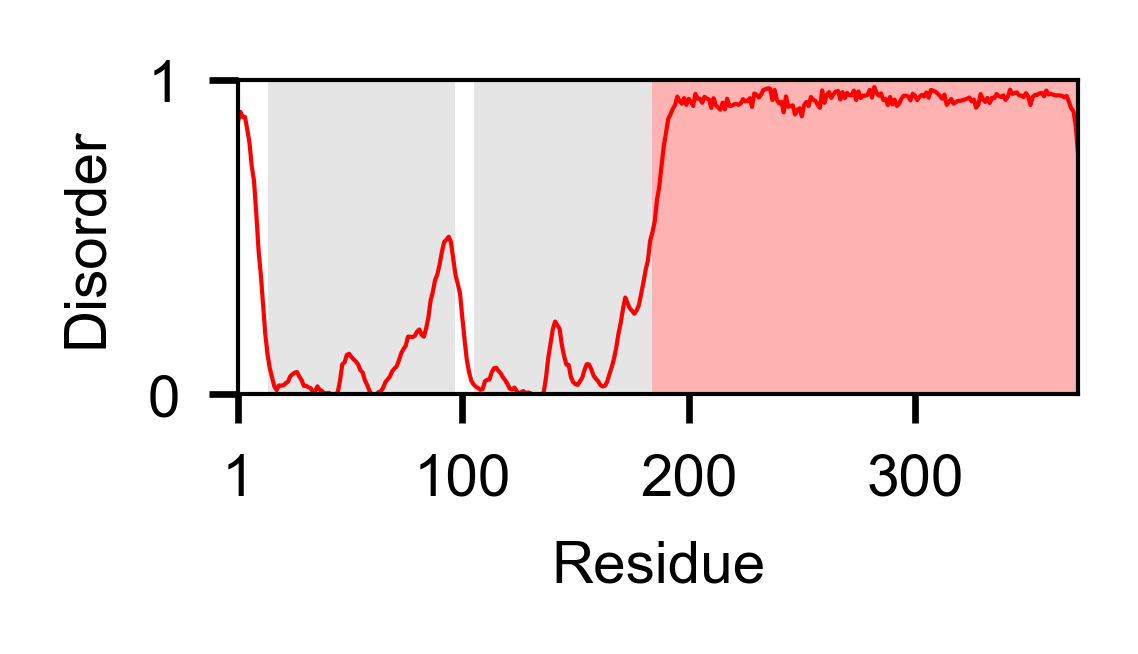

In [4]:
figure(num=None, figsize=(2, 1.2), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

IDRs = meta.predict_disorder_domains(a1)
disorder = IDRs.disorder
res_idx = np.arange(1,len(disorder)+1)

plt.plot(res_idx, disorder, color='r', linewidth=0.5)
plt.xlim(1,res_idx[-1])
plt.xticks([1,100,200,300], fontsize=7)
plt.yticks([0,1], fontsize=7)
plt.ylim([0,1])
plt.xlabel('Residue', fontsize=7)
plt.ylabel('Disorder', fontsize=7)

for x in IDRs.disordered_domain_boundaries:
    ax.axvspan(x[0]+1,x[1], color='r', alpha=0.3, linewidth=0)
    print(x)
    

ax.axvspan(14,97, color='grey', alpha=0.2, linewidth=0)
ax.axvspan(105,184, color='grey', alpha=0.2, linewidth=0)
    
plt.tight_layout()
plt.savefig('a1_disorder.pdf')